In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#data Proportion of youth (aged 15-24 years) not in education, employment or training (%)
df_youth = pd.read_csv('D:/SEMESTER 6/Data Mining/Proyek UAS/youth not in education, employment or training.csv', delimiter=';')
df_youth

,country,2016,2017,2018
0,Brunei Darussalam,NaN,"9,7","20,7"
1,Cambodia,NaN,NaN,NaN
2,Indonesia,"23,2","21,4","22,1"
3,Lao PDR,NaN,"16,1",NaN
4,Malaysia,"11,7","11,8","12,5"
5,Myanmar,NaN,"16,6",13
6,Philippines,"22,1","21,7",NaN
7,Singapore,"4,1","4,5","4,3"
8,Thailand,"13,7","14,4","14,5"
9,Vietnam,NaN,NaN,NaN


In [18]:
df_youth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  10 non-null     object
 1   2016     5 non-null      object
 2   2017     8 non-null      object
 3   2018     6 non-null      object
dtypes: object(4)
memory usage: 448.0+ bytes


In [19]:
#ubah data type
df_youth['2016'] = df_youth['2016'].str.replace(',','.')
df_youth['2016'] = df_youth['2016'].astype('float')
df_youth['2017'] = df_youth['2017'].str.replace(',','.')
df_youth['2017'] = df_youth['2017'].astype('float')
df_youth['2018'] = df_youth['2018'].str.replace(',','.')
df_youth['2018'] = df_youth['2018'].astype('float')
df_youth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  10 non-null     object 
 1   2016     5 non-null      float64
 2   2017     8 non-null      float64
 3   2018     6 non-null      float64
dtypes: float64(3), object(1)
memory usage: 448.0+ bytes


In [20]:
df_youth.isna().sum()

country    0
2016       5
2017       2
2018       4
dtype: int64

In [21]:
#create melt data
df_youth2 = df_youth.dropna(thresh=3)#buang data negara yang missing valuenya lebih dari satu
df_youth2 = pd.melt(df_youth2, id_vars=['country'], value_vars=['2016','2017','2018'])
df_youth2.rename(columns = {'variable': 'year', 'value': 'value %'}, inplace = True)
df_youth2

,country,year,value %
0,Brunei Darussalam,2016,NaN
1,Indonesia,2016,23.2
2,Malaysia,2016,11.7
3,Myanmar,2016,NaN
4,Philippines,2016,22.1
5,Singapore,2016,4.1
6,Thailand,2016,13.7
7,Brunei Darussalam,2017,9.7
8,Indonesia,2017,21.4
9,Malaysia,2017,11.8


In [22]:
df_youth2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  21 non-null     object 
 1   year     21 non-null     object 
 2   value %  18 non-null     float64
dtypes: float64(1), object(2)
memory usage: 632.0+ bytes


In [23]:
df_youth2.year = df_youth2.year.astype('float').astype('Int32')

In [24]:
def groupedbarplot(df, width=0.8, annotate="values", ax=None, **kw):
    ax = ax or plt.gca()
    n = len(df.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(df.columns, pos):
        bars.append(ax.bar(np.arange(len(df))+x, df[col].values, width=w, **kw))
        # matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
        for val, xi in zip(df[col].values, np.arange(len(df))+x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2), 
                            textcoords="offset points",
                            ha="center", va="bottom")
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index)
    return bars

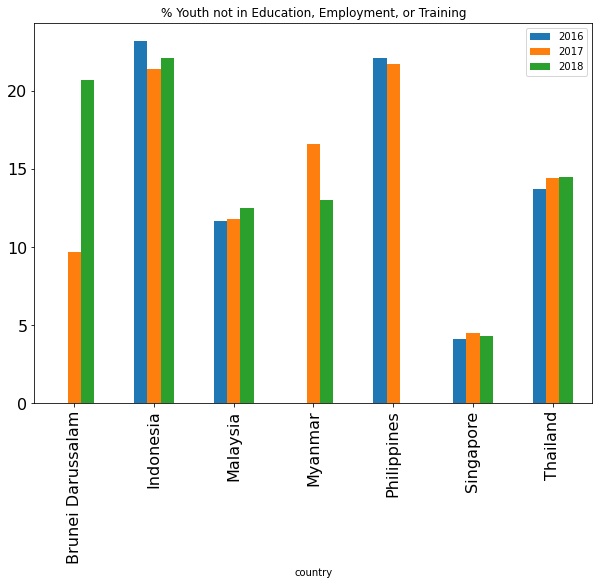

In [33]:
df_youth3 = df_youth.dropna(thresh=3)#buang data negara yang missing valuenya lebih dari satu
df_youth3.plot(x='country',
        kind='bar',
        stacked=False,
        figsize=(10,7),
        fontsize=16,
        title='% Youth not in Education, Employment, or Training')
plt.show()

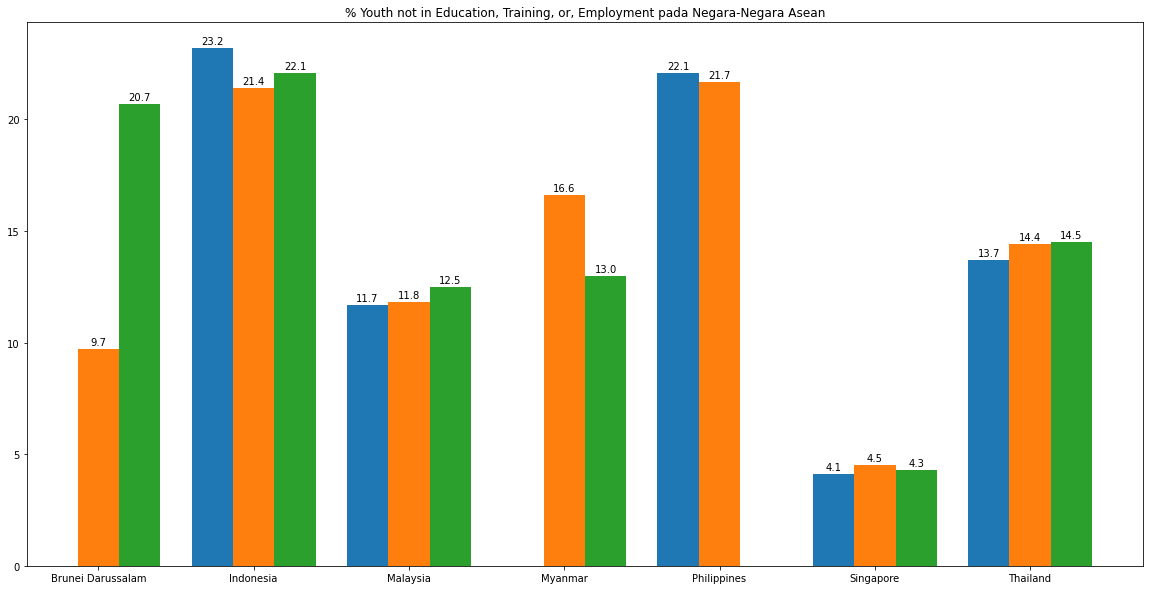

In [25]:
youthpivot = pd.pivot_table(df_youth2, values="value %", index=["country"], columns=['year']) #reshape data
plt.figure(figsize=(20,10))
plt.title('% Youth not in Education, Training, or, Employment pada Negara-Negara Asean')
groupedbarplot(youthpivot)
plt.show()

In [26]:
youthpivot

year,2016,2017,2018
country,,,
Brunei Darussalam,NaN,9.7,20.7
Indonesia,23.2,21.4,22.1
Malaysia,11.7,11.8,12.5
Myanmar,NaN,16.6,13.0
Philippines,22.1,21.7,NaN
Singapore,4.1,4.5,4.3
Thailand,13.7,14.4,14.5


In [29]:
youthpivot.plot(x='country',
        kind='bar',
        stacked=False,
        figsize=(10,7),
        fontsize=12,
        title='Proporsi Unemployment Berdasarkan Gender')
plt.show()

KeyError: 'country'

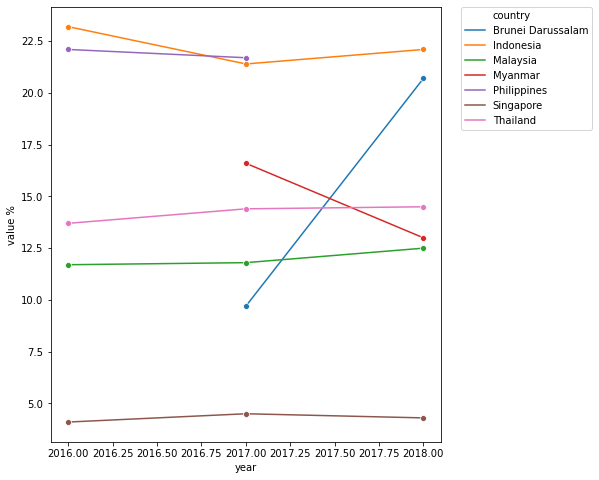

In [39]:
plt.figure(figsize=(7,8))
sns.lineplot(data=df_youth2, x="year", y="value %", hue="country", marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [12]:
youthpivot.describe()

year,2016,2017,2018
count,5.000000,7.00000,6.000000
mean,14.960000,14.30000,14.516667
std,7.890374,6.24393,6.426326
min,4.100000,4.50000,4.300000
25%,11.700000,10.75000,12.625000
50%,13.700000,14.40000,13.750000
75%,22.100000,19.00000,19.150000
max,23.200000,21.70000,22.100000


In [13]:
youthpivot2 = youthpivot.fillna(youthpivot.mean())
youthpivot2

year,2016,2017,2018
country,,,
Brunei Darussalam,14.96,9.7,20.700000
Indonesia,23.20,21.4,22.100000
Malaysia,11.70,11.8,12.500000
Myanmar,14.96,16.6,13.000000
Philippines,22.10,21.7,14.516667
Singapore,4.10,4.5,4.300000
Thailand,13.70,14.4,14.500000


In [37]:
youthpivot[2016].mean()

14.959999999999999

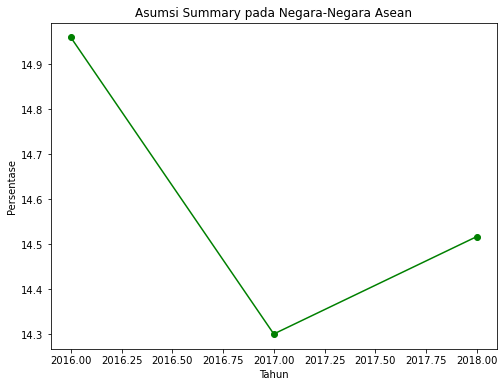

In [38]:
#Summary presentase di ASEAN
asean_youth = pd.DataFrame({ 'Year': [2016, 2017, 2018], 'Value': [youthpivot2[2016].mean(),youthpivot2[2017].mean(),youthpivot2[2018].mean()]})

#buat visualisasi
plt.figure(figsize=(8,6))
plt.title('Asumsi Summary pada Negara-Negara Asean')
plt.ylabel('Persentase')
plt.xlabel('Tahun')
plt.plot(asean_youth['Year'], asean_youth['Value'], color='green', marker='o')